In [1]:
import yaml
import rospkg
import numpy as np
import cv2
#import pandas as pd
import rospy
from nav_msgs.msg import OccupancyGrid
from cv_bridge import CvBridge, CvBridgeError
import matplotlib.pyplot as plt


In [2]:
bridge = CvBridge()
rospy.init_node("rooms", anonymous=True)

In [3]:
# PARA EL REAL?
#map_msg= rospy.wait_for_message('/augmented_map', OccupancyGrid , 20)####WAIT for nav pumas map .. 
#inflated_map= np.asarray(map_msg.data)
# PARA SIM
map_msg= rospy.wait_for_message('/prohibition_layer_map', OccupancyGrid)
#map_msg= rospy.wait_for_message('/augmented_map', OccupancyGrid)
inflated_map= np.asarray(map_msg.data)
pix_per_m=map_msg.info.resolution

101 0


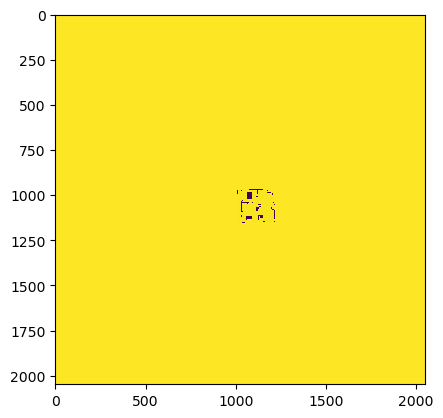

In [4]:
img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))
img_map = (np.max(img_map)-img_map)
print(np.max(img_map),np.min(img_map))
cv2.imwrite('inflatedmap.jpg',img_map)
plt.imshow(img_map)

In [5]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

In [6]:
from os import path


#cv2.imwrite(path.expanduser( '~' )+'/Pictures/imgmap.png', img_map)
img_map_rooms=cv2.imread('inflatedmap.jpg')
#img_map_rooms = cv2.cvtColor(img_map_rooms, cv2.COLOR_BGR2RGB)
img_map_rooms.shape

(2048, 2048, 3)

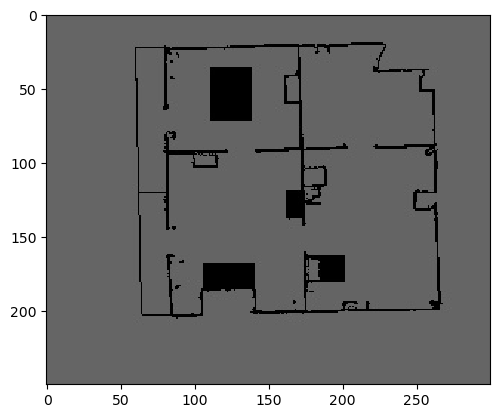

In [7]:
# MODIFICAR DE ACUERDO AL TAMAÑO DE LA IMAGEN ORIGINAL !!!!

ini = 950 
plt.imshow(img_map_rooms[ini:1200,ini:1250])  ## IMAGE FOR ROOM REGIOS

In [8]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
#cv2.imwrite('/home/roboworks/Pictures/imgmap.png', img_map)
#img_map_rooms=cv2.imread('/home/roboworks/Pictures/imgmap.png')

def mouse_crop(event, x, y, flags, param):
    roomss=['liv_room','kitchen','bedroom','din_room']
    # grab references to the global variables
    global x_start, y_start, x_end, y_end, cropping,room_no
    
    # if the left mouse button was DOWN, start RECORDING
    # (x, y) coordinates and indicate that cropping is being
    if event == cv2.EVENT_LBUTTONDOWN:
        

        x_start, y_start, x_end, y_end = x, y, x, y
        cropping = True
        

    # Mouse is Moving
    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping :
            x_end, y_end = x, y

    # if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates
        x_end, y_end = x, y
        cropping = False # cropping is finished

        refPoint = [(x_start, y_start), (x_end, y_end)]

        if len(refPoint) == 2: #when two points were found
            room_no+=1
            print (room_no)
            cv2.rectangle(ii, (x_start, y_start), (x_end, y_end), (255*np.random.rand(),255*np.random.rand(),255*np.random.rand()), -1)
            
            regions.append(((x_start+ini, y_start+ini), (x_end+ini, y_end+ini)))
            print (regions)
            cv2.putText(ii, 
                        f'{roomss[room_no-1]}', 
                        (x_start,y_start+10),
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.4, 
                        (255, 255, 255),
                        1,
                        cv2.LINE_AA)
            #ii = cv2.resize(ii, (960, 540)) 
            cv2.imshow("rooms", ii)



In [9]:
# CAPTURAR CON EL ORDEN:
# -living room
# -kitchen
# -bedroom
# -dining_room

cropping = False

x_start, y_start, x_end, y_end = 0, 0, 0, 0

image = img_map_rooms[ini:1250,ini:1250]  # MODIFICAR DE ACUERDO AL TAMAÑO DE LA IMAGEN ORIGINAL !!!!
oriImage = image.copy()
ii = image.copy()
room_no=0
regions=[]
global room_no , regions

cv2.namedWindow("image")
cv2.setMouseCallback("image", mouse_crop)

while True:
    i = image.copy()

    if not cropping:
        #image = cv2.resize(image, (960, 540)) 
        cv2.imshow("image", image)
        

    elif cropping:
        cv2.rectangle(i, (x_start, y_start), (x_end, y_end), (255, 255,255), 6)
        #i = cv2.resize(i, (960, 540)) 
        cv2.imshow("image", i)
    
    
    
    keystroke = cv2.waitKey(0)
    if 32 <= keystroke and keystroke < 128:
        key = chr(keystroke).lower()
        print (key)
        if key=='q':
            cv2.destroyAllWindows()
            
            break


#living_room_px_region=np.asarray(regions[0])
#kitchen_px_region=np.asarray(regions[1])
#bedroom_px_region=np.asarray(regions[2])
#dining_room_px_region=np.asarray(regions[3])
    
# close all open windows

1
[((1033, 976), (1122, 1041))]
2
[((1033, 976), (1122, 1041)), ((1125, 1044), (1216, 1147))]
3
[((1033, 976), (1122, 1041)), ((1125, 1044), (1216, 1147)), ((1123, 974), (1212, 1039))]
4
[((1033, 976), (1122, 1041)), ((1125, 1044), (1216, 1147)), ((1123, 974), (1212, 1039)), ((1034, 1046), (1125, 1151))]
q


In [11]:
print(regions)
rospack = rospkg.RosPack() 
file_path = rospack.get_path('config_files')
np.save(file_path+"/room_regions_stickler",regions)

[((1033, 976), (1122, 1041)), ((1125, 1044), (1216, 1147)), ((1123, 974), (1212, 1039)), ((1034, 1046), (1125, 1151))]


# HASTA AQUI LA PARTE DE GUARDAR LAS COORDENADAS DE ROOMS
## ABAJO SON SOLO PRUEBAS  (requiere algunas variables de lo anterior)

In [42]:
from human_detector.srv import Human_detector ,Human_detectorResponse ,Human_detectorRequest 
from geometry_msgs.msg import  TransformStamped, Pose, Point, Quaternion
import tf as tf
import tf2_ros as tf2

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp


In [52]:

class TF_MANAGER:
    def __init__(self):
        self._tfbuff = tf2.Buffer()
        self._lis = tf2.TransformListener(self._tfbuff)
        self._tf_static_broad = tf2.StaticTransformBroadcaster()
        self._broad = tf2.TransformBroadcaster()

    def _fillMsg(self, pos=[0, 0, 0], rot=[0, 0, 0, 1], point_name='', ref="map"):
        TS = TransformStamped()
        TS.header.stamp = rospy.Time.now()
        TS.header.frame_id = ref
        TS.child_frame_id = point_name
        TS.transform.translation = Point(*pos)
        TS.transform.rotation = Quaternion(*rot)
        return TS

    def pub_tf(self, pos=[0, 0, 0], rot=[0, 0, 0, 1], point_name='', ref="map"):
        dinamic_ts = self._fillMsg(pos, rot, point_name, ref)
        self._broad.sendTransform(dinamic_ts)

    def pub_static_tf(self, pos=[0, 0, 0], rot=[0, 0, 0, 1], point_name='', ref="map"):
        static_ts = self._fillMsg(pos, rot, point_name, ref)
        self._tf_static_broad.sendTransform(static_ts)

    def change_ref_frame_tf(self, point_name='', rotational=[0, 0, 0, 1], new_frame='map'):
        try:
            traf = self._tfbuff.lookup_transform(
                new_frame, point_name, rospy.Time(0))
            translation, _ = self.tf2_obj_2_arr(traf)
            self.pub_static_tf(pos=translation, rot=rotational,
                               point_name=point_name, ref=new_frame)
            return True
        except:
            return False

    def getTF(self, target_frame='', ref_frame='map'):
        try:
            tf = self._tfbuff.lookup_transform(
                ref_frame, target_frame, rospy.Time(0), rospy.Duration(1.5))
            return self.tf2_obj_2_arr(tf)
        except:
            return [False, False]

    def tf2_obj_2_arr(self, transf):
        pos = []
        pos.append(transf.transform.translation.x)
        pos.append(transf.transform.translation.y)
        pos.append(transf.transform.translation.z)

        rot = []
        rot.append(transf.transform.rotation.x)
        rot.append(transf.transform.rotation.y)
        rot.append(transf.transform.rotation.z)
        rot.append(transf.transform.rotation.w)

        return [pos, rot]

def detect_human_to_tf(dist = 6):
    req = Human_detectorRequest()
    req.dist = dist
    humanpose=human_detect_server(req)
    #print ("humanpose",humanpose)
    if (np.asarray((humanpose.x,humanpose.y,humanpose.z)).all()== np.zeros(3).all()):
        #print ("ASARRAY",np.asarray((humanpose.x,humanpose.y,humanpose.z)))
        return False
    else:
        tf_man.pub_static_tf(np.asarray((humanpose.x,humanpose.x,humanpose.z)),point_name='human', ref='head_rgbd_sensor_link')
        rospy.sleep(0.5)
        succ=tf_man.change_ref_frame_tf('human')
        rospy.sleep(0.5)
        #print("SUCC?", succ)
        return succ
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp


In [60]:
living_room_px_region=np.asarray(((1012, 1045), (1125, 1151)))
kitchen_px_region=np.asarray(((1123, 1040), (1217, 1149)))
bedroom_px_region=np.asarray(((1123, 971), (1212, 1038)))
dining_room_px_region=np.asarray(((1027, 968), (1122, 1043)))

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

In [36]:
tf_man = TF_MANAGER()
human_detect_server = rospy.ServiceProxy('/detect_human' , Human_detector)  ####HUMAN FINDER OPPOSEBASED

In [68]:
humanpose=detect_human_to_tf()
print(humanpose)

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp


True


In [69]:
if not humanpose:
    print("NO HUMAN")
else:
    human_pose,_=tf_man.getTF('human')
    print(human_pose)
    pose=human_pose[:2]
    print(pose)
    px_pose_human=np.asarray(([origin_map_img[1]+ round(pose[1]/pix_per_m),
                               origin_map_img[0]+ round(pose[0]/pix_per_m)]))
    print(px_pose_human)
    iimg=draw_at(px_pose_human[0], px_pose_human[1] , img_map )
    
    print(np.flip(px_pose_human))

[1.486671249970676, -4.112169130221305, 0.2343149229567703]
[1.486671249970676, -4.112169130221305]
[ 942 1054]
[1054  942]


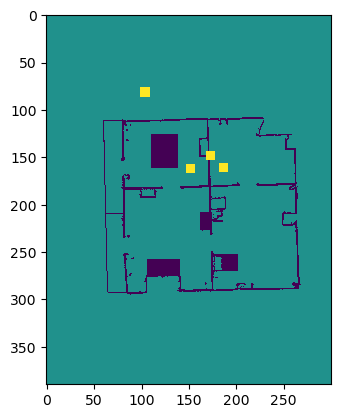

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

In [71]:
plt.imshow(img_map[ini-90:1250,ini:1250])

In [64]:
px_pose = np.flip(px_pose_human)
px_region= dining_room_px_region

if (px_pose[1]< px_region[1,1]) and (px_pose[1]> px_region[0,1]) and (px_pose[0]> px_region[0,0]) and (px_pose[0]< px_region[1,0]) : 
    print (f'in  SIIII')
        
        
        

in  SIIII


         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.6/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r